<a href="https://colab.research.google.com/github/mispasyuk/py_task/blob/main/Task_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/archive_1.zip -d .


Archive:  /content/drive/MyDrive/archive_1.zip
  inflating: ./gpx-tracks-from-hikr.org.csv  


In [ ]:
!pip install gpxplotter --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.5/413.5 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import tqdm
import requests
from bs4 import BeautifulSoup
import seaborn as sns
from gpxplotter import read_gpx_file, create_folium_map, add_segment_to_map

In [ ]:
data = pd.read_csv("/content/gpx-tracks-from-hikr.org.csv")

In [ ]:
data.head()

,_id,length_3d,user,start_time,max_elevation,bounds,uphill,moving_time,end_time,max_speed,gpx,difficulty,min_elevation,url,downhill,name,length_2d
0,5afb229e8f80884aaad9c6ea,10832.953016,Bergfritz,2018-05-11 07:37:40,1934.47,"{'min': {'type': 'Point', 'coordinates': [13.2...",612.880,12155.0,2018-05-11 11:38:23,1.595493,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<gpx x...",T2 - Mountain hike,1322.96,http://www.hikr.org/tour/post131855.html,609.670,"Remsteinkopf, 1945 m",10832.953016
1,5afb229e8f80884aaad9c6eb,12259.376315,Bergfritz,2018-05-12 07:25:08,2186.21,"{'min': {'type': 'Point', 'coordinates': [13.1...",614.753,13876.0,2018-05-12 12:08:28,1.394320,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<gpx x...",T3 - Difficult Mountain hike,1266.40,http://www.hikr.org/tour/post131856.html,1193.733,"Schuhflicker, 2214 m",12259.376315
2,5afb229e8f80884aaad9c6ec,22980.168081,igor,2018-05-11 06:29:38,2265.00,"{'min': {'type': 'Point', 'coordinates': [8.99...",2255.976,28971.0,2018-05-11 15:32:43,1.503002,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<gpx x...",T3 - Difficult Mountain hike,176.54,http://www.hikr.org/tour/post131839.html,2177.626,Cima d'erbea Est quota 2164m e Gaggio 2267m,22980.168081
3,5afb229e8f80884aaad9c6ed,24903.503470,rkroebl,2018-05-10 07:06:22,962.42,"{'min': {'type': 'Point', 'coordinates': [8.43...",882.312,26726.0,2018-05-10 16:15:18,1.516689,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<gpx x...",T2 - Mountain hike,388.51,http://www.hikr.org/tour/post131840.html,901.052,Waldstätterweg: Alpnachstad - Buochs,24903.503470
4,5afb229e8f80884aaad9c6ee,19581.273819,rkroebl,2018-05-11 05:44:58,697.57,"{'min': {'type': 'Point', 'coordinates': [8.61...",310.662,18197.0,2018-05-11 12:54:25,1.542405,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<gpx x...",T2 - Mountain hike,438.50,http://www.hikr.org/tour/post131845.html,305.372,Waldstätterweg: Buochs - Beckenried und Gersau...,19581.273819


In [ ]:
data = data.drop(["bounds", "gpx", "start_time", "end_time"], axis = 1)

In [ ]:
data.isna().any()

_id              False
length_3d        False
user             False
max_elevation     True
uphill           False
moving_time      False
max_speed        False
difficulty       False
min_elevation     True
url              False
downhill         False
name             False
length_2d        False
dtype: bool

In [ ]:
data = data.ffill()

In [30]:
avg_speed = data.max_speed.mean()
data.diff_class = list(map(lambda x: x.split(" ")[0], data.difficulty))
data.min_elevation = list(map(lambda x: 0 if x < 0 else x, data.min_elevation))
data.max_speed = list(map(lambda x: avg_speed if x > 10 else x, data.max_speed))

In [ ]:
mode_columns = ["user", "difficulty", "name"]
for i in mode_columns:
  print(f"Наименование колонки: {i}, мода: {data[i].mode()[0]}")

Наименование колонки: user, мода: cristina
Наименование колонки: difficulty, мода: T2 - Mountain hike
Наименование колонки: name, мода: Schöckl, 1442 m


In [31]:
num_max = data.max(numeric_only=True)
num_min = data.min(numeric_only=True)
num_median = data.median(numeric_only= True)
num_avg = data.mean(numeric_only=True)

In [32]:
for i in num_max.keys():
  print(f"Наименование колонки: {i}, минимум: {num_min[i]}, максимум: {num_max[i]}, медиана: {num_median[i]}, среднее значение: {num_avg[i]}")

Наименование колонки: length_3d, минимум: 0.0, максимум: 31891804.548778903, медиана: 12005.765487814271, среднее значение: 18747.71046890621
Наименование колонки: max_elevation, минимум: -1.0, максимум: 5633.462890625, медиана: 1977.48, среднее значение: 1928.0037331464882
Наименование колонки: uphill, минимум: 0.0, максимум: 35398.00678100582, медиана: 881.9999999999993, среднее значение: 942.1843617346894
Наименование колонки: moving_time, минимум: 0.0, максимум: 189380.0, медиана: 12990.0, среднее значение: 12848.445268099827
Наименование колонки: max_speed, минимум: 0.0, максимум: 9.934726472825488, медиана: 1.367020375915702, среднее значение: 1.3946488962605978
Наименование колонки: min_elevation, минимум: 0.0, максимум: 4180.0, медиана: 952.320007, среднее значение: 1008.6608786260929
Наименование колонки: downhill, минимум: 0.0, максимум: 52379.2, медиана: 823.199002075196, среднее значение: 879.1455393364841
Наименование колонки: length_2d, минимум: 0.0, максимум: 31891804.54

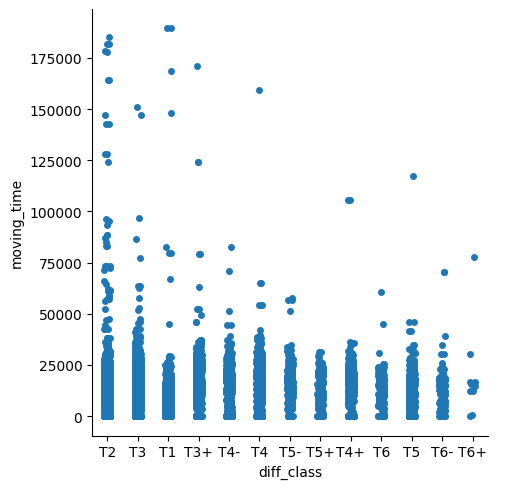

In [ ]:
sns.catplot(data, x = "diff_class", y = "moving_time")

<Axes: xlabel='diff_class', ylabel='max_speed'>

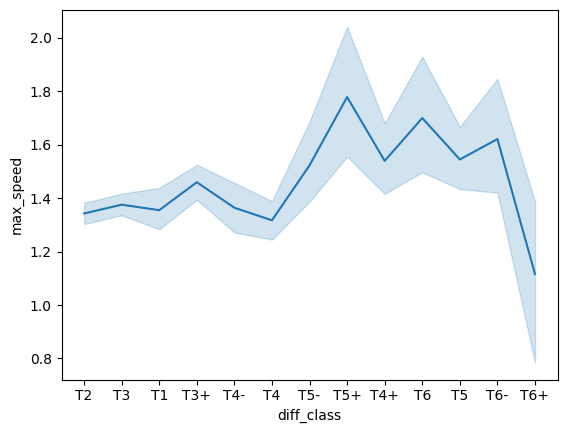

In [33]:
sns.lineplot(data, x = "diff_class", y = "max_speed" )

<Axes: xlabel='diff_class', ylabel='uphill'>

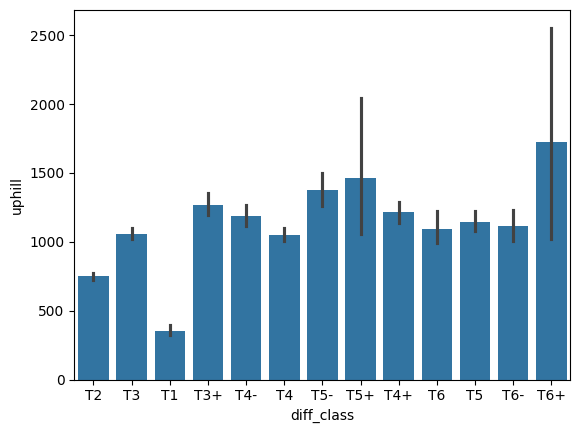

In [ ]:
sns.barplot(data, x = "diff_class", y = "uphill")

<Axes: xlabel='diff_class', ylabel='downhill'>

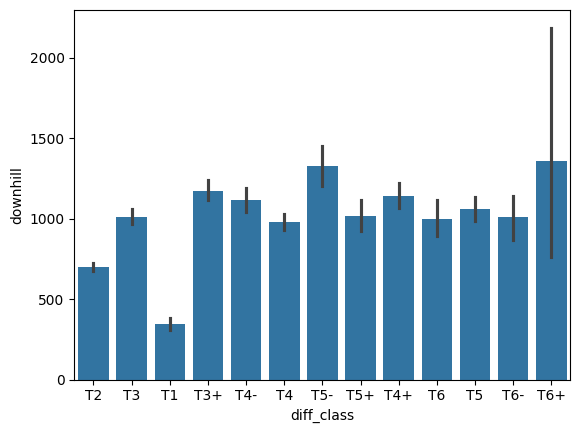

In [ ]:
sns.barplot(data, x = "diff_class", y = "downhill")

In [34]:
data.describe()

,length_3d,max_elevation,uphill,moving_time,max_speed,min_elevation,downhill,length_2d
count,1.214100e+04,12141.000000,12141.000000,12141.000000,12141.000000,12141.000000,12141.000000,1.214100e+04
mean,1.874771e+04,1928.003733,942.184362,12848.445268,1.394649,1008.660879,879.145539,1.874771e+04
std,4.093098e+05,779.335958,1065.498993,11599.792248,1.222495,574.246626,1028.618856,4.093098e+05
min,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,8.254129e+03,1372.500000,420.142000,5260.000000,1.078841,560.537210,256.519000,8.254129e+03
50%,1.200577e+04,1977.480000,882.000000,12990.000000,1.367020,952.320007,823.199002,1.200577e+04
75%,1.645813e+04,2487.900000,1301.005000,18514.000000,1.604181,1379.340000,1266.923000,1.645813e+04
max,3.189180e+07,5633.462891,35398.006781,189380.000000,9.934726,4180.000000,52379.200000,3.189180e+07


In [35]:
print(np.corrcoef(x = data.max_speed, y = data.length_3d))
print(np.corrcoef(x = data.max_elevation, y = data.moving_time))

[[1.         0.01517546]
 [0.01517546 1.        ]]
[[1.         0.23933174]
 [0.23933174 1.        ]]


In [36]:
np.mean((data.max_speed - np.mean(data.max_speed))**2)

1.494371068173333

In [ ]:
def get_html_from_url(url):
  response = requests.get(url)
  with open(f"./data.html", mode="wb") as file:
    file.write(response.content)

In [ ]:
def get_link_from_html():
  with open("/content/data.html") as fp:
      soup = BeautifulSoup(fp, "html.parser")
  a = soup.find_all("a", href = True)
  a_str = "".join(str(x) for x in a)
  link = a_str[a_str[:a_str.find(".gpx")].rfind("https"):a_str.find(".gpx") + 4]
  return link

In [ ]:
def create_map_from_link(link):
  response = requests.get(link)
  with open("./map.gpx", mode="wb") as file:
    file.write(response.content)
  the_map = create_folium_map()
  for track in read_gpx_file('/content/map.gpx'):
      for i, segment in enumerate(track['segments']):
        add_segment_to_map(the_map, segment)
  return the_map

In [ ]:
get_html_from_url(data["url"][344])

In [ ]:
link = get_link_from_html()

In [ ]:
final_map = create_map_from_link(link)

In [37]:
final_map

##**Отчет**

В работе была осуществлена работа с датасетом и анализ некоторых составляющих данных, рассмотрена их взаимосвязь.
Сделано:
- датасет был скачан с kaggle, загружен в гугл-диск, а потом загружен в colab, к которому привязан диск;
- Проверена целостность данных, заполнены поля с пропущенными значениями;
- удалены ненужные колонки;
- создана новая колонка diff_class, показывающая только класс сложности без добавочных характеристик;
- все значения колонки min_elevation, меньшие нуля, заменили на 0;
- Посчитана мода для некоторых колонок

*Выводы:*

1) Самым часто публикующим маршруты пользователем является cristina

2) Туристы чаще всего идут по машруту сложности T2 - Mountain hike, который является не самым простым, но довольно проходимым;

3) Самой часто посещаемой горной вершиной является гора Schöckl в Австрии, 1442 m;

- Посчитаны такие характеристики как минимум, максимум, медиана и среднее значение для колонок length_3d, length_2d, max_elevation, min_elevation, uphill, downhill, moving_time, max_speed;

**Визуализация данных:**

- Построен график распределения времени (диаграмма рассеивания), которое туристы тратили на маршрут,взависимости от сложности трека. Исходя из графика, можно сделать вывод, что туристы чаще тратят немного времени на маршруты по любой категории сложности, но более продвинутые маршруты, как правило, менее продолжительные по времени;

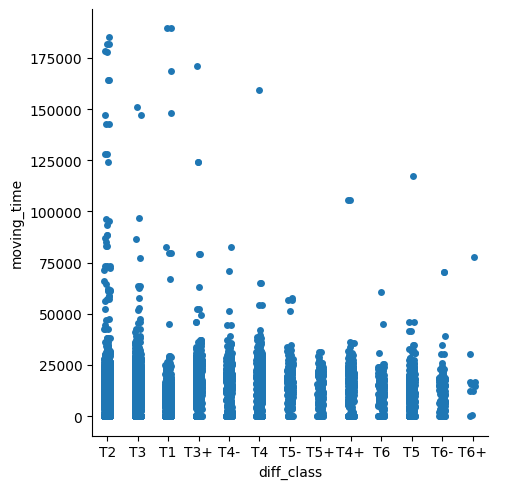

- Построен график зависимости максимальной скорости движения туриста от категории сложности маршрута.

*Выводы:*

На графике видно, что на сложных и на простых маршрутах максимальная скорость движения в среднем достаточно низкая. На сложных треках это может быть обусловлено большим набором и сбросом высоты, крутизной подъема и другими характеристиками, а на легких может быть связано с тем, что туда ходят еще не профессиональные и малоопытные туристы, а также потому что эти маршруты больше не для спортивных достижений, а для прогулки. На маршрутах средней сложности максимальная скорость туристов в среднем выше, чем на других ктегориях, так как туристы уже достаточно опытные и физически подготовленные, а препятствия на маршруте проходимые.

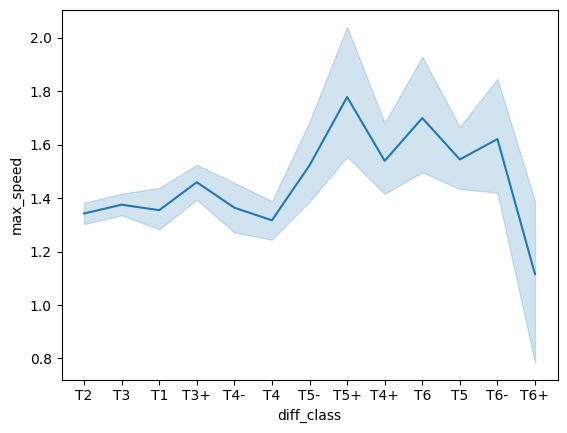

- Также были построены гистограммы зависимости набора и сброса высоты от сложности маршрута.

*Выводы:*

на маршрутах высокой сложности наборы и сбросы в среднем больше, чем на маршрутах полегче. На простых треках набор и сброс высоты небольшой, что логично.

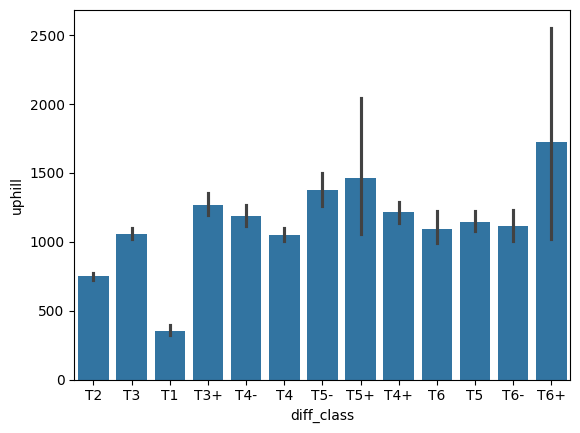

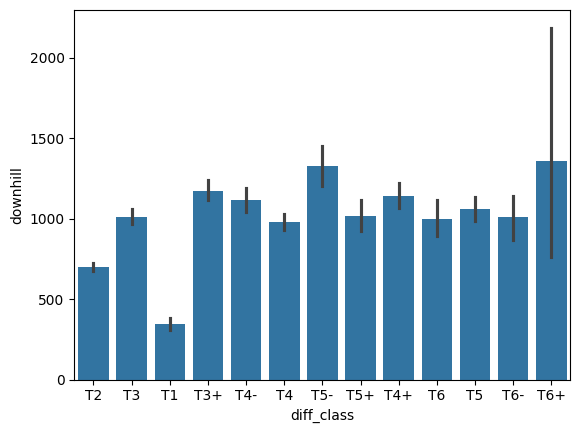

**Статистический анализ:**

- Посчитан коэффициент корреляции Пирсона между максимальной скоростью и длиной маршрута, а также между максимальной высотой и временем нахождения на маршруте.

*Выводы:*

Взаимосвязь между максимальной скоростью движения и длиной трека очень слабая, поэтому можно сделать вывод, что эти характеристики в очень малой степени зависят друг от друга.

Наоборот, коэффициент корреляции между высшей точкой маршрута и продолжительностью довольно большой, что свидетельствует о наличии связи между этими величинами. Изменение значения одной характеристики влечет изменение значения другой.

- посчитана дисперсия величины max_speed. Так как готовую формулу я не нашла, посчитала по определению через матожидание квадрата отклонения значения случайной величины от ее матожидания. Отклонение от  матожидания получилось незначительным, что неудивительно, так как значения этой характеристики лежат в диапазоне от 0 до 9.934726 (км/ч)


**Дополнительный анализ (геоданные):**

- С помощью requests обратилась к url, который находится в колонке url таблицы data. Получила html код страницы. С помощью BeautifulSoup распарсила данные html, нашла в нем gpx-файл (файл, который получается при записи трека), далее с помощью requests скачала его и с помощью gpxplotter визуализировала данный трек на карте.
